In [145]:
# import modules/dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import seaborn as sns
from datetime import datetime,date
from datetime import date
import hvplot.pandas
import pytz
import geopandas as gpd
import sweetviz as sv
from config import api_key
from config import client_secret
from config import geo_api_key
import petpy


In [146]:
#Petfinder API Wrapper
# create config file - and do this part
pf= petpy.Petfinder(key=api_key ,secret=client_secret)




Pull Data from Petfinder API


In [150]:
# Find Listed Animals on Petfinder for animal type dog and status adoptable dogs

adoptable_dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois')  # Adjust results_per_page to limit the number of results
adoptable_dogs

,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped
0,69403034,IL566,https://www.petfinder.com/dog/georgia-peach-69...,Dog,Dog,Young,Female,Medium,Medium,[],...,None,None,Gurnee,IL,60031,US,69403034,dog,il566,NaN
1,69402913,IL943,https://www.petfinder.com/dog/marty-69402913/i...,Dog,Dog,Baby,Male,Medium,None,"[Friendly, Affectionate, Loyal, Gentle, Playfu...",...,None,None,Crystal Lake,IL,60014,US,69402913,dog,il943,NaN
2,69402902,IL943,https://www.petfinder.com/dog/daxi-69402902/il...,Dog,Dog,Baby,Female,Medium,None,"[Friendly, Affectionate, Loyal, Gentle, Playfu...",...,None,None,Crystal Lake,IL,60014,US,69402902,dog,il943,NaN
3,69402868,IL943,https://www.petfinder.com/dog/athena-69402868/...,Dog,Dog,Baby,Female,Small,None,"[Friendly, Affectionate, Loyal, Gentle, Playfu...",...,None,None,Crystal Lake,IL,60014,US,69402868,dog,il943,NaN
4,69401751,IN27,https://www.petfinder.com/dog/nash-69401751/in...,Dog,Dog,Baby,Male,Medium,Short,"[Friendly, Affectionate, Playful, Funny, Loves...",...,3355 Bertholet Blvd,None,Valparaiso,IN,46385,US,69401751,dog,in27,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,59210427,IN246,https://www.petfinder.com/dog/maverick-5921042...,Dog,Dog,Young,Male,Medium,None,[],...,PO Box 596,"Crown Point, In 46308",Lowell,IN,46356,US,59210427,dog,in246,NaN
3996,59207995,IL72,https://www.petfinder.com/dog/alesso-59207995/...,Dog,Dog,Adult,Male,Medium,None,[],...,1997 N. Clybourn,None,Chicago,IL,60614,US,59207995,dog,il72,NaN
3997,59204386,IL496,https://www.petfinder.com/dog/xena-59204386/il...,Dog,Dog,Senior,Female,Medium,None,[Kid Friendly twelve positive],...,None,None,Chicago,IL,60647,US,59204386,dog,il496,NaN
3998,59176446,IL81,https://www.petfinder.com/dog/sophie-snow-5917...,Dog,Dog,Adult,Female,Medium,None,[],...,16173 Baseline Road,None,Genoa,IL,60135,US,59176446,dog,il81,NaN


In [148]:


# Find Listed Animals on Petfinder for animal type dog and status adopted dogs

adopted_dogs =  pf.animals(animal_type='dog', results_per_page=100,pages=40,return_df=True,location='Chicago, Illinois', status='adopted')  # Adjust results_per_page to limit the number of results
adopted_dogs



,id,organization_id,url,type,species,age,gender,size,coat,tags,...,contact.address.state,contact.address.postcode,contact.address.country,animal_id,animal_type,organization_id,primary_photo_cropped.small,primary_photo_cropped.medium,primary_photo_cropped.large,primary_photo_cropped.full
0,69399996,WI542,https://www.petfinder.com/dog/bruno-69399996/w...,Dog,Dog,Young,Male,Large,None,[],...,WI,53168,US,69399996,dog,wi542,NaN,NaN,NaN,NaN
1,69399387,IL274,https://www.petfinder.com/dog/sophie-69399387/...,Dog,Dog,Adult,Female,Small,None,[],...,IL,60162,US,69399387,dog,il274,NaN,NaN,NaN,NaN
2,69399386,IL274,https://www.petfinder.com/dog/kenya-69399386/i...,Dog,Dog,Adult,Female,Small,None,[],...,IL,60162,US,69399386,dog,il274,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
3,69389386,IL72,https://www.petfinder.com/dog/ralston-69389386...,Dog,Dog,Senior,Male,Small,Short,[],...,IL,60614,US,69389386,dog,il72,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...,https://dl5zpyw5k3jeb.cloudfront.net/photos/pe...
4,69386024,IN704,https://www.petfinder.com/dog/squid-69386024/i...,Dog,Dog,Baby,Male,Medium,None,[],...,IN,46383,US,69386024,dog,in704,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,66449383,IL81,https://www.petfinder.com/dog/georgia-66449383...,Dog,Dog,Adult,Female,Medium,None,[],...,IL,60135,US,66449383,dog,il81,NaN,NaN,NaN,NaN
3996,66449388,IL81,https://www.petfinder.com/dog/river-66449388/i...,Dog,Dog,Adult,Male,Medium,None,[],...,IL,60135,US,66449388,dog,il81,NaN,NaN,NaN,NaN
3997,66449392,IL81,https://www.petfinder.com/dog/shadow-66449392/...,Dog,Dog,Adult,Female,Medium,None,[],...,IL,60135,US,66449392,dog,il81,NaN,NaN,NaN,NaN
3998,66449402,IL81,https://www.petfinder.com/dog/11-2016-66449402...,Dog,Dog,Adult,Female,Small,None,[],...,IL,60135,US,66449402,dog,il81,NaN,NaN,NaN,NaN


In [151]:


# merge the two dataframes pulled from the API 
merged = pd.concat([adoptable_dogs, adopted_dogs],ignore_index=True)


merged

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

Formatting and creating new columns in the dataframe

In [ ]:
# update the columns
merged_df = merged[['id', 'organization_id', 'url', 'species', 'age', 'gender',
       'size', 'coat', 'tags', 'name', 'description', 'organization_animal_id',
       'photos', 'status', 'status_changed_at', 'published_at',
       'distance', 'breeds.primary', 'breeds.secondary', 'breeds.mixed',
       'breeds.unknown', 'colors.primary', 'colors.secondary',
       'colors.tertiary','attributes.special_needs', 'attributes.shots_current',
       'environment.children', 'environment.dogs', 'environment.cats',
       'contact.address.address1',
       'contact.address.address2', 'contact.address.city',
       'contact.address.state', 'contact.address.postcode',
       'contact.address.country', 'animal_id', 'animal_type',
       'organization_id']]

In [ ]:

#Remove Duplicate Index Values
merged_df.reset_index(drop=True, inplace=True)
adopted_dogs.reset_index(drop=True, inplace=True)

In [ ]:
# Standardizing date format
merged_df['published_at'] = pd.to_datetime(merged_df['published_at'])
merged_df['status_changed_at'] = pd.to_datetime(merged_df['status_changed_at'])

# added a new column to the dataframe to count the number of days on the site for adopted dogs
merged_df['days_on_petfinder'] = (merged_df['status_changed_at'] - merged_df['published_at']).dt.days
merged_df['days_on_petfinder'] = merged_df['days_on_petfinder'].round()




datetime.datetime(2023, 10, 22, 16, 46, 47, 881647, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [ ]:
# creating date format for adoptable days online
today = datetime.now()

merged_df['today']= datetime.now()

central_timezone = pytz.timezone('US/Central')
aware_datetime = today.astimezone(central_timezone)
aware_datetime

datetime.datetime(2023, 10, 22, 16, 49, 18, 68275, tzinfo=<DstTzInfo 'US/Central' CDT-1 day, 19:00:00 DST>)

In [ ]:
# creating new column for adoptable days online

merged_df['today'] = aware_datetime

merged_df['adoptable_days_online'] =(merged_df['today'] - merged_df['published_at']).dt.days

In [ ]:
# merging addresses into a single column
address_df = merged_df.iloc[:,30:36]
address_df

,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country
0,510 N. LaSalle,None,Chicago,IL,60654,US
1,3355 Bertholet Blvd,None,Valparaiso,IN,46385,US
2,3355 Bertholet Blvd,None,Valparaiso,IN,46385,US
3,None,None,Hartland,WI,53029,US
4,None,None,Hartland,WI,53029,US
...,...,...,...,...,...,...
7995,16173 Baseline Road,None,Genoa,IL,60135,US
7996,16173 Baseline Road,None,Genoa,IL,60135,US
7997,16173 Baseline Road,None,Genoa,IL,60135,US
7998,16173 Baseline Road,None,Genoa,IL,60135,US


In [ ]:
# creating new column for the address

address_df['combined_address'] = address_df.apply(lambda row: ', '.join(str(x) for x in row), axis=1)
address_df

,contact.address.address1,contact.address.address2,contact.address.city,contact.address.state,contact.address.postcode,contact.address.country,combined_address
0,510 N. LaSalle,None,Chicago,IL,60654,US,"510 N. LaSalle , None, Chicago, IL, 60654, US"
1,3355 Bertholet Blvd,None,Valparaiso,IN,46385,US,"3355 Bertholet Blvd, None, Valparaiso, IN, 463..."
2,3355 Bertholet Blvd,None,Valparaiso,IN,46385,US,"3355 Bertholet Blvd, None, Valparaiso, IN, 463..."
3,None,None,Hartland,WI,53029,US,"None, None, Hartland, WI, 53029, US"
4,None,None,Hartland,WI,53029,US,"None, None, Hartland, WI, 53029, US"
...,...,...,...,...,...,...,...
7995,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7996,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7997,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"
7998,16173 Baseline Road,None,Genoa,IL,60135,US,"16173 Baseline Road, None, Genoa, IL, 60135, US"


In [ ]:
# renaming column
merged_df['address'] = address_df['combined_address']

Output data to CSV file

In [ ]:

# merged_df.to_csv("merged_dog_data.csv")

Analysis

In [ ]:
# import csv file
dogs = pd.read_csv("Datasets/merged_dog_data.csv")


Clean the dataset

In [ ]:
dogs = dogs.drop_duplicates(subset=['id'])
dogs.count()

Unnamed: 0                  7934
id                          7934
organization_id             7934
organization_id.1           7934
url                         7934
species                     7934
age                         7934
gender                      7934
size                        7934
coat                        2835
tags                        7934
name                        7934
description                 6660
organization_animal_id      4504
photos                      7934
status                      7934
status_changed_at           7934
published_at                7934
distance                    7934
breeds.primary              7934
breeds.secondary            3030
breeds.mixed                7934
breeds.unknown              7934
colors.primary              3469
colors.secondary            1838
colors.tertiary              202
attributes.special_needs    7934
attributes.shots_current    7934
environment.children        3100
environment.dogs            4084
environmen

In [ ]:
# filter the dataset by adopted and adoptable
adoptable = dogs[dogs["status"] == "adoptable"]
adoptable.count()

Unnamed: 0                  3999
id                          3999
organization_id             3999
organization_id.1           3999
url                         3999
species                     3999
age                         3999
gender                      3999
size                        3999
coat                        1748
tags                        3999
name                        3999
description                 3549
organization_animal_id      1905
photos                      3999
status                      3999
status_changed_at           3999
published_at                3999
distance                    3999
breeds.primary              3999
breeds.secondary            1731
breeds.mixed                3999
breeds.unknown              3999
colors.primary              2325
colors.secondary            1226
colors.tertiary              123
attributes.special_needs    3999
attributes.shots_current    3999
environment.children        1528
environment.dogs            2141
environmen

In [ ]:
adopted = dogs[dogs["status"] == "adopted"]
adopted.count()

Unnamed: 0                  3935
id                          3935
organization_id             3935
organization_id.1           3935
url                         3935
species                     3935
age                         3935
gender                      3935
size                        3935
coat                        1087
tags                        3935
name                        3935
description                 3111
organization_animal_id      2599
photos                      3935
status                      3935
status_changed_at           3935
published_at                3935
distance                    3935
breeds.primary              3935
breeds.secondary            1299
breeds.mixed                3935
breeds.unknown              3935
colors.primary              1144
colors.secondary             612
colors.tertiary               79
attributes.special_needs    3935
attributes.shots_current    3935
environment.children        1572
environment.dogs            1943
environmen

***Total percentage of Dogs which were adpoted or adoptable by color***







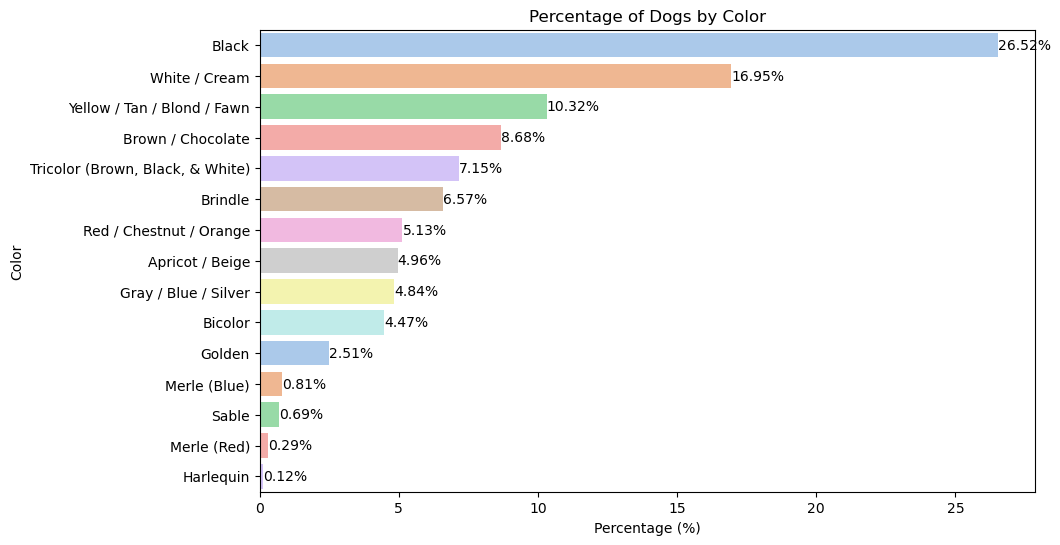

In [ ]:
color_counts = dogs['colors.primary'].value_counts()
# Calculate the percentages
total_count = color_counts.sum()
color_percentages = (color_counts / total_count) * 100
# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=color_percentages, y=color_counts.index, palette='pastel')
plt.xlabel('Percentage (%)')
plt.ylabel('Color')
plt.title('Percentage of Dogs by Color')
# Annotate the bars with percentage values
for i, v in enumerate(color_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')
plt.savefig('total_dogs_by_color.png')
plt.show()

Analysis of dogs by color and status

In [ ]:

# percentage of adoptable dogs by color
adoptable_color = adoptable.groupby("colors.primary").count()
adoptable_color = adoptable_color["id"]
adoptable_color_df = pd.DataFrame(adoptable_color)
adoptable_color_df.reset_index(inplace=True)
adoptable_color_df['% Total'] = adoptable_color_df['id'] / len(adoptable)
adoptable_color_df = adoptable_color_df.sort_values(by='id', ascending=False)
adoptable_color_df

,colors.primary,id,% Total
2,Black,623,0.155789
13,White / Cream,411,0.102776
14,Yellow / Tan / Blond / Fawn,242,0.060515
4,Brown / Chocolate,221,0.055264
3,Brindle,172,0.043011
12,"Tricolor (Brown, Black, & White)",132,0.033008
6,Gray / Blue / Silver,123,0.030758
10,Red / Chestnut / Orange,115,0.028757
0,Apricot / Beige,104,0.026007
1,Bicolor,102,0.025506


In [ ]:
# adoptable days online by color
adoptable_color_days = adoptable.groupby('colors.primary')['adoptable_days_online'].mean()
adoptable_count = adoptable.groupby('colors.primary')['id'].count()
adoptable_color_days_df = pd.concat([adoptable_color_days, adoptable_count], axis=1)
adoptable_color_days_df.reset_index(inplace=True)
adoptable_color_days_df = adoptable_color_days_df.sort_values(by='id', ascending=False).round()
top_5_adoptable = adoptable_color_days_df.head(10)

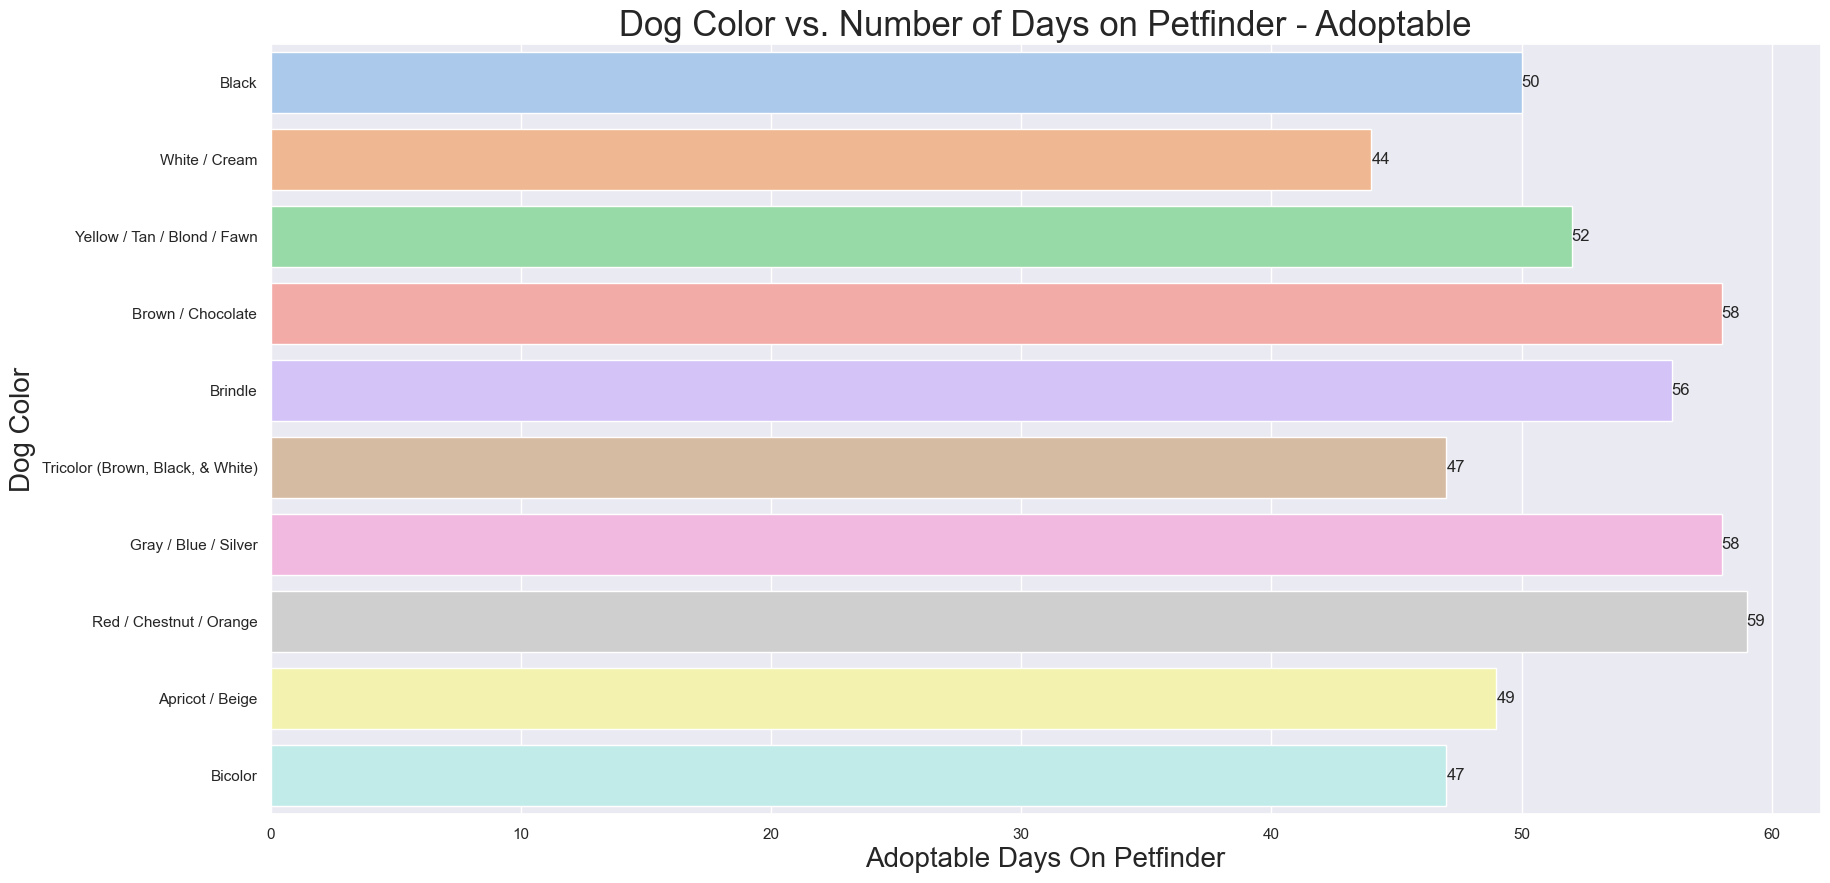

In [ ]:
#Sets the size of the bars
# sort values later
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'adoptable_days_online',data = top_5_adoptable,y='colors.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adoptable Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Color', fontsize = 20)
plt.title('Dog Color vs. Number of Days on Petfinder - Adoptable', fontsize = 25)
plt.savefig('adoptable_days_online_by_color.png')
plt.show()

In [ ]:
# percentage of adopted dogs by color
adopted_color = adopted.groupby("colors.primary").count()
adopted_color = adopted_color["id"]
adopted_color_df = pd.DataFrame(adopted_color)
adopted_color_df.reset_index(inplace=True)
adopted_color_df['% Total'] = adopted_color_df['id'] / len(adopted)
adopted_color_df = adopted_color_df.sort_values(by='id', ascending=False)
adopted_color_df



,colors.primary,id,% Total
2,Black,297,0.075476
13,White / Cream,177,0.044981
12,"Tricolor (Brown, Black, & White)",116,0.029479
14,Yellow / Tan / Blond / Fawn,116,0.029479
4,Brown / Chocolate,80,0.020330
0,Apricot / Beige,68,0.017281
10,Red / Chestnut / Orange,63,0.016010
3,Brindle,56,0.014231
1,Bicolor,53,0.013469
6,Gray / Blue / Silver,45,0.011436


In [ ]:
# adopted days online by color
adopted_color_days = adopted.groupby('colors.primary')['days_on_petfinder'].mean()
adopted_count = adopted.groupby('colors.primary')['id'].count()
adopted_color_days_df = pd.concat([adopted_color_days, adopted_count], axis=1)
adopted_color_days_df.reset_index(inplace=True)
adopted_color_days_df = adopted_color_days_df.sort_values(by='id', ascending=False).round()
top_5_adopted = adopted_color_days_df.head(10)
top_5_adopted

,colors.primary,days_on_petfinder,id
2,Black,13.0,297
13,White / Cream,13.0,177
12,"Tricolor (Brown, Black, & White)",13.0,116
14,Yellow / Tan / Blond / Fawn,12.0,116
4,Brown / Chocolate,12.0,80
0,Apricot / Beige,9.0,68
10,Red / Chestnut / Orange,14.0,63
3,Brindle,13.0,56
1,Bicolor,13.0,53
6,Gray / Blue / Silver,13.0,45


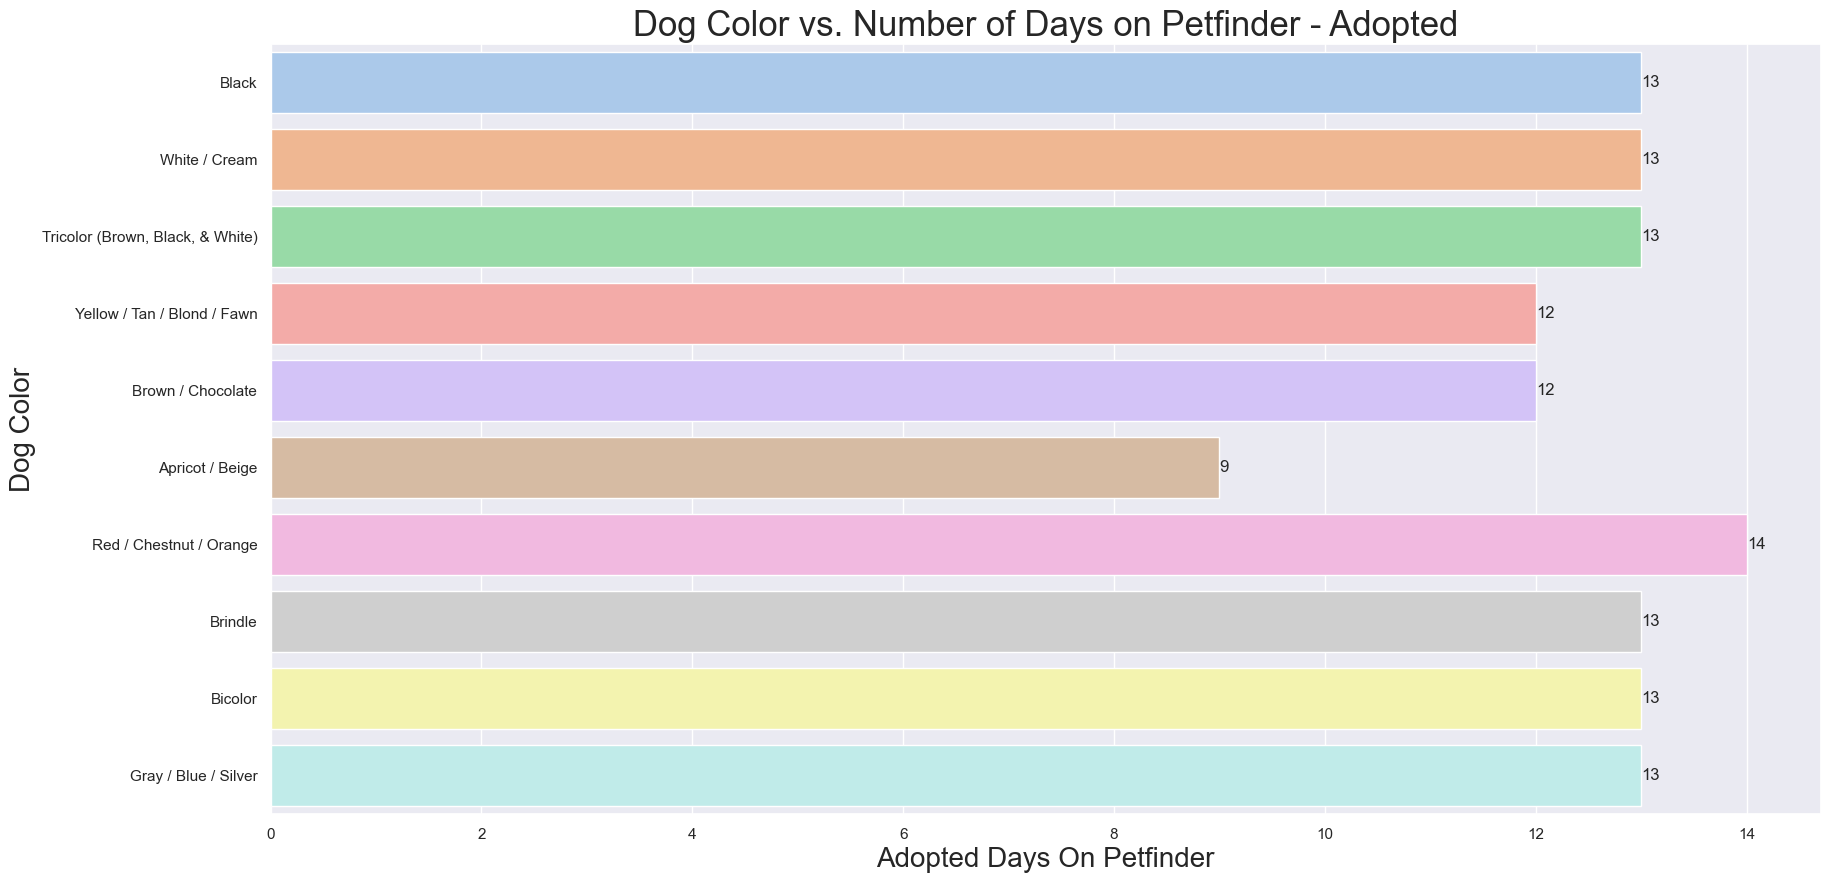

In [ ]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'days_on_petfinder',data = top_5_adopted,y='colors.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adopted Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Color', fontsize = 20)
plt.title('Dog Color vs. Number of Days on Petfinder - Adopted', fontsize = 25)
plt.savefig('adopted_days_online_by_color.png')
plt.show()

Analysis of dogs by breed

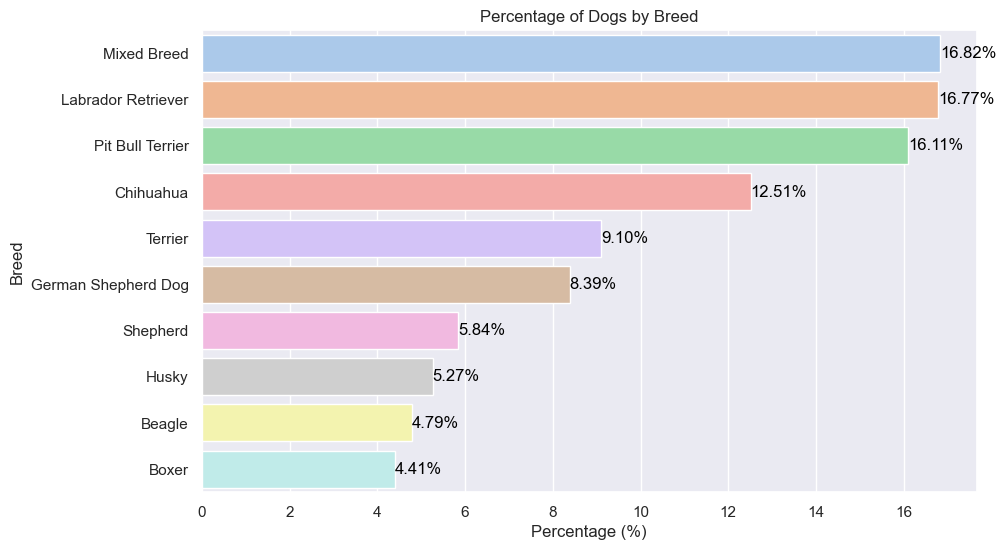

In [ ]:
breed_counts = dogs['breeds.primary'].value_counts().head(10)
# Calculate the percentages
total_count = breed_counts.sum()
breed_percentages = (breed_counts / total_count) * 100
# Create a horizontal bar chart showing percentages
plt.figure(figsize=(10, 6))
sns.set_palette('pastel')
ax=sns.barplot(x=breed_percentages, y=breed_counts.index, palette='pastel')
plt.xlabel('Percentage (%)')
plt.ylabel('Breed')
plt.title('Percentage of Dogs by Breed')
# Annotate the bars with percentage values
for i, v in enumerate(breed_percentages):
    ax.text(v, i, f'{v:.2f}%', color='black', va='center')
plt.savefig('percentage_of_dogs_by_breed.png')
plt.show()

Top 10 Breeds

In [ ]:
# adoptable days online by breed
adoptable_breeds_days = adoptable.groupby('breeds.primary')['adoptable_days_online'].mean()
adoptable_breed_count = adoptable.groupby('breeds.primary')['id'].count()
adoptable_breeds_days_df = pd.concat([adoptable_breeds_days, adoptable_breed_count], axis=1)
adoptable_breeds_days_df.reset_index(inplace=True)
adoptable_breeds_days_df = adoptable_breeds_days_df.sort_values(by='id', ascending=False).round()
top_10_adoptable_breeds = adoptable_breeds_days_df.head(10)

top_10_adoptable_breeds

,breeds.primary,adoptable_days_online,id
107,Pit Bull Terrier,61.0,537
96,Mixed Breed,59.0,461
87,Labrador Retriever,46.0,310
40,Chihuahua,52.0,190
70,German Shepherd Dog,49.0,178
141,Terrier,50.0,165
128,Shepherd,51.0,127
8,American Staffordshire Terrier,59.0,112
28,Boxer,58.0,103
79,Husky,46.0,98


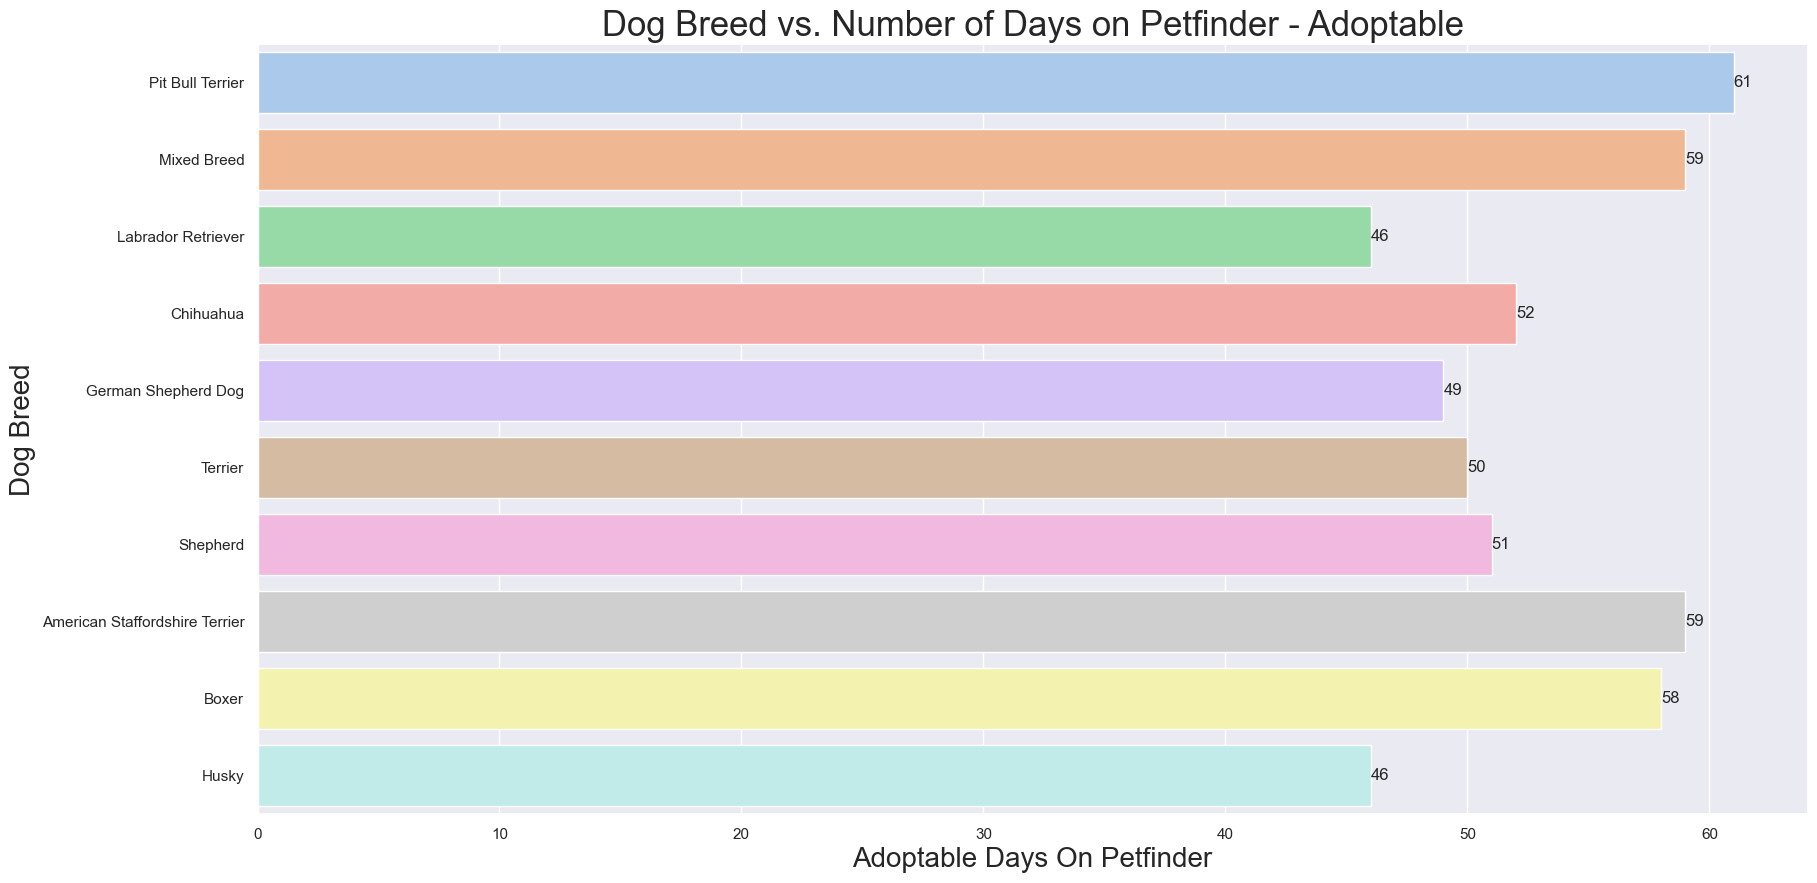

In [ ]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'adoptable_days_online',data = top_10_adoptable_breeds,y='breeds.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adoptable Days On Petfinder', fontsize = 20)
plt.ylabel('Dog Breed', fontsize = 20)
plt.title('Dog Breed vs. Number of Days on Petfinder - Adoptable', fontsize = 25)
plt.savefig('adoptable_days_online_by_breed.png')
plt.show()

In [ ]:
# average adopted days online by breed
adopted_breeds_days = adopted.groupby('breeds.primary')['days_on_petfinder'].mean()
adopted_breed_count = adopted.groupby('breeds.primary')['id'].count()
adopted_breeds_days_df = pd.concat([adopted_breeds_days, adopted_breed_count], axis=1)
adopted_breeds_days_df.reset_index(inplace=True)
adopted_breeds_days_df = adopted_breeds_days_df.sort_values(by='id', ascending=False).round()
top_10_adopted_breeds = adopted_breeds_days_df.head(10)

top_10_adopted_breeds

,breeds.primary,days_on_petfinder,id
88,Labrador Retriever,5.0,394
46,Chihuahua,3.0,335
99,Mixed Breed,8.0,245
141,Terrier,4.0,217
71,German Shepherd Dog,6.0,174
109,Pit Bull Terrier,11.0,139
16,Beagle,6.0,130
82,Husky,3.0,123
130,Shepherd,5.0,118
23,Black Labrador Retriever,2.0,112


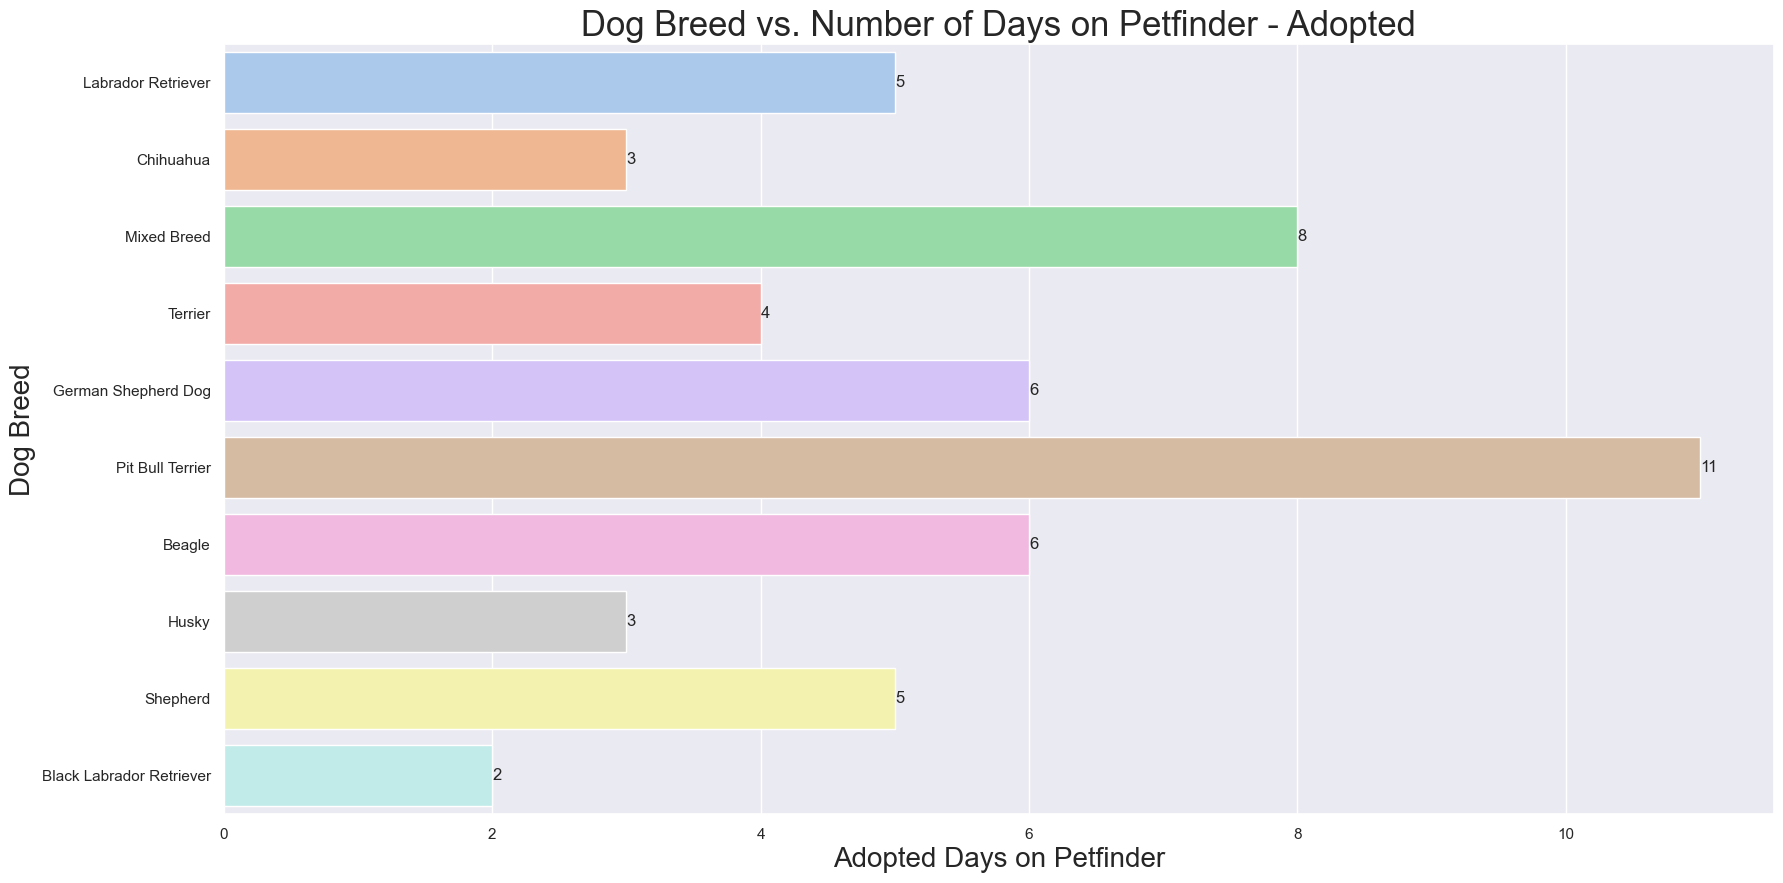

In [ ]:
#Sets the size of the bars
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x = 'days_on_petfinder',data = top_10_adopted_breeds,y='breeds.primary',palette='pastel')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Adopted Days on Petfinder', fontsize = 20)
plt.ylabel('Dog Breed', fontsize = 20)
plt.title('Dog Breed vs. Number of Days on Petfinder - Adopted', fontsize = 25)
plt.savefig('adopted_days_online_by_breed.png')
plt.show()

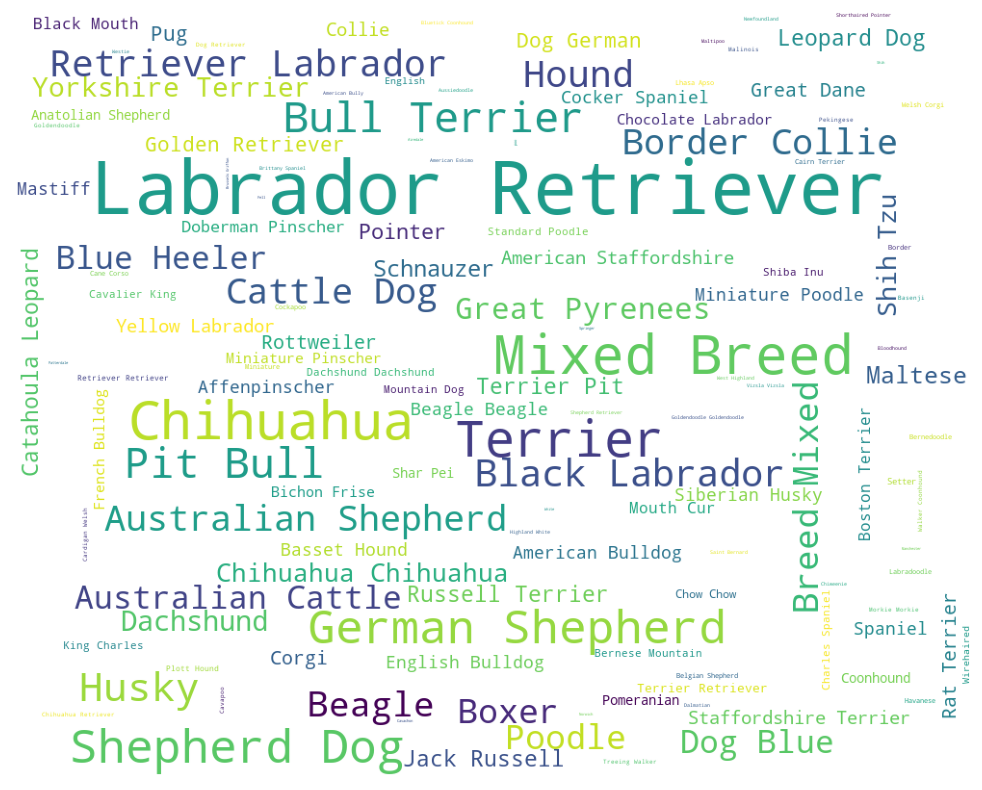

In [ ]:
from wordcloud import WordCloud
fig,ax = plt.subplots(figsize =(14,10))
words = ' '.join(dogs['breeds.primary'].loc[dogs['status']=='adopted'].values)
wordcloud = WordCloud(max_font_size=None,background_color='white',width=1000,height=800).generate(words)
plt.axis('off')
plt.savefig('adopted_breeds_word_cloud.png')
plt.imshow(wordcloud)


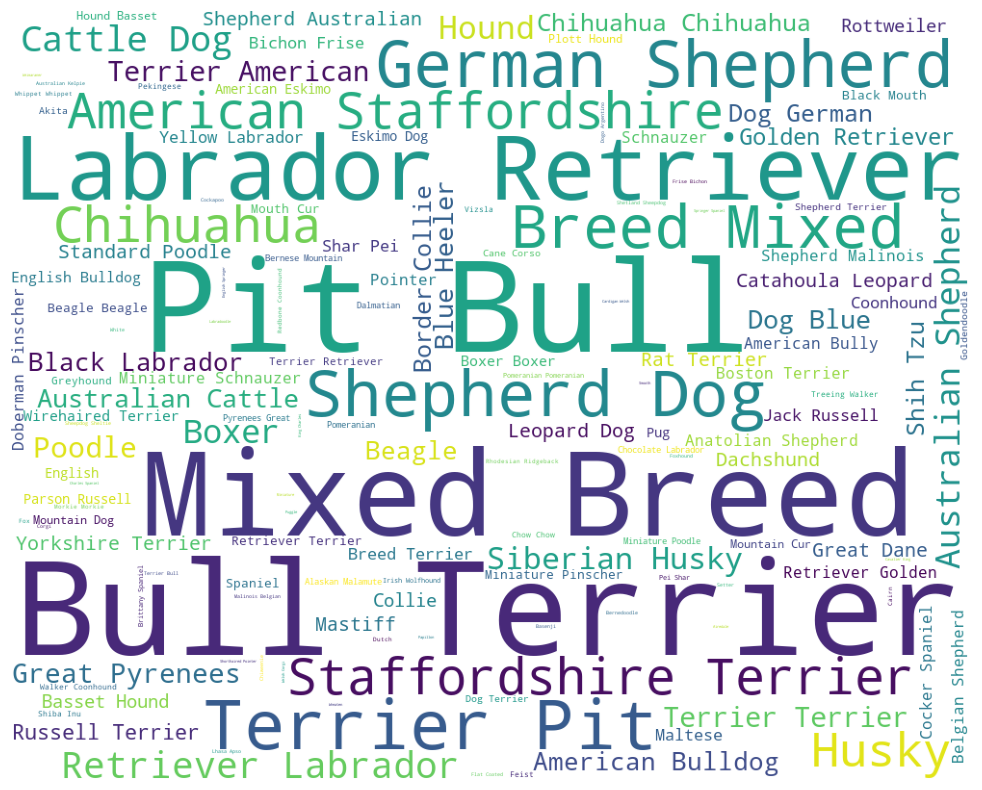

In [ ]:

fig,ax = plt.subplots(figsize =(14,10))
words = ' '.join(dogs['breeds.primary'].loc[dogs['status']=='adoptable'].values)
wordcloud = WordCloud(max_font_size=None,background_color='white',width=1000,height=800).generate(words)
plt.axis('off')
plt.savefig('adoptable_breeds_word_cloud.png')
plt.imshow(wordcloud)
